<a href="https://colab.research.google.com/github/Reeshad-Khan/Machine-Learning/blob/master/Question_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# load required libraries

In [1]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

**Downloading data**

Training data

In [2]:
!wget -O TimeSeriesTrain.csv https://drive.google.com/file/d/11MWhBwnpgIixbX-yt5t98Aoy1ONj08GB/view?usp=sharing

--2021-04-09 09:26:13--  https://drive.google.com/file/d/11MWhBwnpgIixbX-yt5t98Aoy1ONj08GB/view?usp=sharing
Resolving drive.google.com (drive.google.com)... 173.194.216.102, 173.194.216.139, 173.194.216.138, ...
Connecting to drive.google.com (drive.google.com)|173.194.216.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘TimeSeriesTrain.csv’

TimeSeriesTrain.csv     [ <=>                ]  69.85K  --.-KB/s    in 0.004s  

2021-04-09 09:26:13 (18.0 MB/s) - ‘TimeSeriesTrain.csv’ saved [71530]



Testing Data

In [3]:
!wget -O TimeSeriesTest.csv https://drive.google.com/file/d/11MWhBwnpgIixbX-yt5t98Aoy1ONj08GB/view?usp=sharing

--2021-04-09 09:26:56--  https://drive.google.com/file/d/11MWhBwnpgIixbX-yt5t98Aoy1ONj08GB/view?usp=sharing
Resolving drive.google.com (drive.google.com)... 173.194.216.101, 173.194.216.138, 173.194.216.102, ...
Connecting to drive.google.com (drive.google.com)|173.194.216.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘TimeSeriesTest.csv’

TimeSeriesTest.csv      [ <=>                ]  69.86K  --.-KB/s    in 0.003s  

2021-04-09 09:26:56 (23.5 MB/s) - ‘TimeSeriesTest.csv’ saved [71533]



**Read data using pandas dataframe**

### Train Data

In [28]:
train_data = pd.read_csv('/content/drive/MyDrive/TimeSeriesTrain.csv', delimiter=",")
train_data[0:5]

,0.82736,0.86628,0.89891,0.92472,0.94328,0.95429,0.95757,0.95308,0.94092,0.92133,0.89464,0.86133,0.822,0.77733,0.7281,0.67517,0.61945,0.5619,0.50352,0.44532,0.38828,0.3334,0.28159,0.23376,0.1907,0.15314,0.12173,0.096971,0.079286,0.068957,0.066145,0.070879,0.08306,0.10246,0.12873,0.1614,0.1999,0.24355,0.29158,0.34317,...,0.84418.1,0.88827,0.92587,0.95632,0.97907,0.99372,1,0.99779,0.98712,0.96814,0.94118,0.90667,0.8652,0.81747,0.76429,0.70656,0.64526,0.58145,0.51622,0.45069,0.38597,0.3232,0.26344,0.20774,0.15706,0.11228,0.074179,0.043427,0.020565,0.0060012,0,0.0026804,0.014012,0.033814,0.061763,0.097391,0.1401,0.18917,0.24376,1.1
0,0.75455,0.76792,0.78120,0.79435,0.80733,0.82010,0.83263,0.84487,0.85680,0.86838,0.87957,0.89034,0.90067,0.91051,0.91984,0.92863,0.93685,0.94448,0.95149,0.95786,0.96358,0.96861,0.97295,0.97658,0.97948,0.98164,0.98306,0.98373,0.98363,0.98277,0.981140,0.978750,0.975600,0.97169,0.96703,0.96163,0.95549,0.948630,0.941070,0.932810,...,0.41306,0.402060,0.390690,0.378980,0.366970,0.354690,0.342170,0.329460,0.316570,0.303560,0.290450,0.277290,0.264110,0.250960,0.237860,0.22486,0.212000,0.199300,0.186820,0.174580,0.16263,0.15100,0.13971,0.12882,0.11834,0.10832,0.098783,0.089757,0.081271,0.073354,0.06603,0.059323,0.053256,0.047849,0.04312,0.039088,0.035768,0.033172,0.031312,1
1,0.75020,0.75572,0.75346,0.74377,0.72724,0.70469,0.67710,0.64561,0.61151,0.57613,0.54086,0.50709,0.47614,0.44924,0.42749,0.41184,0.40301,0.40153,0.40766,0.42145,0.44267,0.47087,0.50536,0.54525,0.58947,0.63680,0.68592,0.73545,0.78398,0.83012,0.872550,0.910060,0.941580,0.96622,0.98331,0.99238,0.99323,0.985890,0.970650,0.948040,...,0.11772,0.086142,0.060445,0.041529,0.030091,0.026607,0.031307,0.044175,0.064946,0.093117,0.127960,0.168540,0.213760,0.262370,0.313040,0.36438,0.414960,0.463410,0.508430,0.548820,0.58355,0.61177,0.63282,0.64630,0.65204,0.65012,0.640870,0.624840,0.602820,0.575780,0.54484,0.511260,0.476380,0.441590,0.40827,0.377750,0.351270,0.329970,0.314790,1
2,0.74889,0.77037,0.79012,0.80798,0.82381,0.83748,0.84885,0.85785,0.86436,0.86833,0.86971,0.86845,0.86456,0.85802,0.84887,0.83715,0.82292,0.80627,0.78728,0.76608,0.74281,0.71760,0.69064,0.66209,0.63215,0.60102,0.56891,0.53606,0.50268,0.46901,0.435300,0.401780,0.368690,0.33627,0.30476,0.27440,0.24540,0.217980,0.192350,0.168710,...,0.24717,0.212530,0.179950,0.149660,0.121860,0.096757,0.074513,0.055282,0.039193,0.026355,0.016851,0.010741,0.008061,0.008822,0.013011,0.02059,0.031497,0.045647,0.062932,0.083221,0.10636,0.13219,0.16050,0.19110,0.22377,0.25825,0.294320,0.331700,0.370130,0.409330,0.44902,0.488920,0.528760,0.568240,0.60708,0.645030,0.681800,0.717150,0.750830,1
3,0.75024,0.78112,0.80784,0.82993,0.84698,0.85866,0.86474,0.86507,0.85957,0.84828,0.83133,0.80894,0.78140,0.74913,0.71258,0.67231,0.62894,0.58311,0.53556,0.48703,0.43828,0.39009,0.34325,0.29852,0.25662,0.21825,0.18406,0.15463,0.13046,0.11198,0.099543,0.093381,0.093645,0.10038,0.11352,0.13291,0.15828,0.189280,0.225430,0.266210,...,0.78631,0.748590,0.707250,0.662970,0.616500,0.568580,0.519980,0.471490,0.423880,0.377890,0.334230,0.293590,0.256590,0.223770,0.195620,0.17254,0.154860,0.142800,0.136490,0.136000,0.14126,0.15214,0.16840,0.18973,0.21575,0.24599,0.279920,0.316960,0.356500,0.397880,0.44041,0.483410,0.526190,0.568080,0.60840,0.646540,0.681920,0.714010,0.742330,1
4,0.75229,0.77778,0.80155,0.82333,0.84286,0.85990,0.87423,0.88565,0.89400,0.89912,0.90091,0.89927,0.89415,0.88554,0.87345,0.85792,0.83905,0.81693,0.79172,0.76361,0.73280,0.69952,0.66406,0.62668,0.58772,0.54749,0.50634,0.46463,0.42272,0.38100,0.339830,0.299580,0.260630,0.22334,0.18804,0.15507,0.12474,0.097336,0.073127,0.052347,...,0.51360,0.510090,0.505540,0.500080,0.493830,0.486960,0.479610,0.471950,0.464180,0.456450,0.448960,0.441880,0.435380,0.429650,0.424850,0.42111,0.418580,0.417390,0.417630,0.419400,0.42276,0.42776,0.43442,0.44274,0.45269,0.46424,0.477300,0.491780,0.507580,0.524540,0.54252,0.561340,0.580810,0.600710,0.62084,0.640960,0.660840,0.680230,

In [29]:
train_data.shape

(29999, 1501)

In [32]:
train_data_u = train_data.iloc[ : , 0:1500]
train_data_u

,0.82736,0.86628,0.89891,0.92472,0.94328,0.95429,0.95757,0.95308,0.94092,0.92133,0.89464,0.86133,0.822,0.77733,0.7281,0.67517,0.61945,0.5619,0.50352,0.44532,0.38828,0.3334,0.28159,0.23376,0.1907,0.15314,0.12173,0.096971,0.079286,0.068957,0.066145,0.070879,0.08306,0.10246,0.12873,0.1614,0.1999,0.24355,0.29158,0.34317,...,0.79435,0.84418.1,0.88827,0.92587,0.95632,0.97907,0.99372,1,0.99779,0.98712,0.96814,0.94118,0.90667,0.8652,0.81747,0.76429,0.70656,0.64526,0.58145,0.51622,0.45069,0.38597,0.3232,0.26344,0.20774,0.15706,0.11228,0.074179,0.043427,0.020565,0.0060012,0,0.0026804,0.014012,0.033814,0.061763,0.097391,0.1401,0.18917,0.24376
0,0.75455,0.76792,0.78120,0.79435,0.80733,0.82010,0.83263,0.844870,0.856800,0.86838,0.87957,0.89034,0.90067,0.91051,0.91984,0.92863,0.93685,0.94448,0.95149,0.957860,0.963580,0.96861,0.97295,0.97658,0.97948,0.98164,0.98306,0.98373,0.983630,0.98277,0.981140,0.978750,0.975600,0.97169,0.96703,0.96163,0.95549,0.948630,0.941070,0.932810,...,0.423660,0.41306,0.402060,0.390690,0.378980,0.366970,0.354690,0.342170,0.329460,0.316570,0.303560,0.290450,0.277290,0.264110,0.250960,0.237860,0.224860,0.212000,0.199300,0.186820,0.174580,0.16263,0.15100,0.139710,0.128820,0.118340,0.108320,0.098783,0.089757,0.081271,0.073354,0.06603,0.059323,0.053256,0.047849,0.043120,0.039088,0.035768,0.033172,0.031312
1,0.75020,0.75572,0.75346,0.74377,0.72724,0.70469,0.67710,0.645610,0.611510,0.57613,0.54086,0.50709,0.47614,0.44924,0.42749,0.41184,0.40301,0.40153,0.40766,0.421450,0.442670,0.47087,0.50536,0.54525,0.58947,0.63680,0.68592,0.73545,0.783980,0.83012,0.872550,0.910060,0.941580,0.96622,0.98331,0.99238,0.99323,0.985890,0.970650,0.948040,...,0.154090,0.11772,0.086142,0.060445,0.041529,0.030091,0.026607,0.031307,0.044175,0.064946,0.093117,0.127960,0.168540,0.213760,0.262370,0.313040,0.364380,0.414960,0.463410,0.508430,0.548820,0.58355,0.61177,0.632820,0.646300,0.652040,0.650120,0.640870,0.624840,0.602820,0.575780,0.54484,0.511260,0.476380,0.441590,0.408270,0.377750,0.351270,0.329970,0.314790
2,0.74889,0.77037,0.79012,0.80798,0.82381,0.83748,0.84885,0.857850,0.864360,0.86833,0.86971,0.86845,0.86456,0.85802,0.84887,0.83715,0.82292,0.80627,0.78728,0.766080,0.742810,0.71760,0.69064,0.66209,0.63215,0.60102,0.56891,0.53606,0.502680,0.46901,0.435300,0.401780,0.368690,0.33627,0.30476,0.27440,0.24540,0.217980,0.192350,0.168710,...,0.283630,0.24717,0.212530,0.179950,0.149660,0.121860,0.096757,0.074513,0.055282,0.039193,0.026355,0.016851,0.010741,0.008061,0.008822,0.013011,0.020590,0.031497,0.045647,0.062932,0.083221,0.10636,0.13219,0.160500,0.191100,0.223770,0.258250,0.294320,0.331700,0.370130,0.409330,0.44902,0.488920,0.528760,0.568240,0.607080,0.645030,0.681800,0.717150,0.750830
3,0.75024,0.78112,0.80784,0.82993,0.84698,0.85866,0.86474,0.865070,0.859570,0.84828,0.83133,0.80894,0.78140,0.74913,0.71258,0.67231,0.62894,0.58311,0.53556,0.487030,0.438280,0.39009,0.34325,0.29852,0.25662,0.21825,0.18406,0.15463,0.130460,0.11198,0.099543,0.093381,0.093645,0.10038,0.11352,0.13291,0.15828,0.189280,0.225430,0.266210,...,0.819780,0.78631,0.748590,0.707250,0.662970,0.616500,0.568580,0.519980,0.471490,0.423880,0.377890,0.334230,0.293590,0.256590,0.223770,0.195620,0.172540,0.154860,0.142800,0.136490,0.136000,0.14126,0.15214,0.168400,0.189730,0.215750,0.245990,0.279920,0.316960,0.356500,0.397880,0.44041,0.483410,0.526190,0.568080,0.608400,0.646540,0.681920,0.714010,0.742330
4,0.75229,0.77778,0.80155,0.82333,0.84286,0.85990,0.87423,0.885650,0.894000,0.89912,0.90091,0.89927,0.89415,0.88554,0.87345,0.85792,0.83905,0.81693,0.79172,0.763610,0.732800,0.69952,0.66406,0.62668,0.58772,0.54749,0.50634,0.46463,0.422720,0.38100,0.339830,0.299580,0.260630,0.22334,0.18804,0.15507,0.12474,0.097336,0.073127,0.052347,...,0.515960,0.51360,0.510090,0.505540,0.500080,0.493830,0.486960,0.479610,0.471950,0.464180,0.456450,0.448960,0.441880,0.435380,0.429650,0.424850,0.421110,0.418580,0.417390,0.417630,0.419400,0.42276,0.42776,0.434420,0.442740,0.452690,0.464240,0.477300,0.

**Pre-processing**

In [44]:
X_train = train_data.values
X_train[0:5]

array([[0.75455 , 0.76792 , 0.7812  , ..., 0.033172, 0.031312, 1.      ],
       [0.7502  , 0.75572 , 0.75346 , ..., 0.32997 , 0.31479 , 1.      ],
       [0.74889 , 0.77037 , 0.79012 , ..., 0.71715 , 0.75083 , 1.      ],
       [0.75024 , 0.78112 , 0.80784 , ..., 0.71401 , 0.74233 , 1.      ],
       [0.75229 , 0.77778 , 0.80155 , ..., 0.68023 , 0.69889 , 1.      ]])

In [55]:
y_train = X[:,-1]
y_train.shape

(299,)

In [57]:
X_train = train_data_u[:299].values
X_train.shape

(299, 1500)

### Test data

In [40]:
test_data = pd.read_csv('/content/drive/MyDrive/TimeSeriesTest.csv', delimiter=",")
test_data[0:5]

,0.74974,0.76999,0.78539,0.79591,0.80157,0.8025,0.7989,0.79105,0.7793,0.76404,0.74575,0.72492,0.70209,0.6778,0.65261,0.62707,0.60174,0.57711,0.55369,0.53189,0.51212,0.49468,0.47985,0.46781,0.45868,0.45252,0.44928,0.44887,0.45112,0.45581,0.46263,0.47124,0.48127,0.4923,0.50387,0.51555,0.52686,0.53736,0.54661,0.5542,...,0.7213,0.7644,0.80312,0.83697,0.86553,0.88848,0.90561,0.91678,0.92196,0.92122,0.91472,0.90271,0.88554,0.86361,0.83741,0.80749,0.77442,0.73885,0.70143,0.66281,0.62368,0.58469,0.54648,0.50964,0.47472,0.44224,0.41264,0.38628,0.36347,0.34442,0.32927,0.31809,0.31084,0.30744,0.30769,0.31137,0.31816,0.32769,0.33957,1.1
0,0.74947,0.77483,0.79941,0.82292,0.84513,0.86577,0.88461,0.90144,0.91604,0.92823,0.93785,0.94475,0.94882,0.94997,0.94814,0.94328,0.93539,0.92449,0.91062,0.893870,0.874340,0.852150,0.827470,0.800470,0.771350,0.740330,0.70766,0.67357,0.63836,0.60228,0.565630,0.528690,0.491760,0.455140,0.419100,0.383930,0.349910,0.317290,0.286320,0.25723,...,0.10039,0.120830,0.143880,0.169360,0.197090,0.22685,0.25842,0.29155,0.32597,0.36142,0.39762,0.43427,0.47108,0.50777,0.54404,0.57961,0.61419,0.64753,0.67938,0.70948,0.737630,0.763620,0.787270,0.808430,0.826980,0.84280,0.85583,0.86601,0.87332,0.87777,0.87939,0.87825,0.87444,0.86807,0.85927,0.84821,0.83508,0.82006,0.80337,1
1,0.75044,0.75926,0.76294,0.76162,0.75553,0.74500,0.73047,0.71243,0.69147,0.66821,0.64334,0.61756,0.59158,0.56614,0.54193,0.51963,0.49987,0.48321,0.47016,0.461130,0.456450,0.456350,0.460960,0.470300,0.484290,0.502740,0.52536,0.55177,0.58150,0.61400,0.648660,0.684800,0.721720,0.758690,0.794950,0.829780,0.862440,0.892260,0.918590,0.94087,...,0.11043,0.093322,0.081654,0.075506,0.074853,0.07956,0.08939,0.10401,0.12299,0.14582,0.17192,0.20066,0.23135,0.26326,0.29567,0.32785,0.35907,0.38864,0.41591,0.44030,0.461290,0.478420,0.491360,0.499840,0.503710,0.50292,0.49753,0.48770,0.47370,0.45587,0.43467,0.41062,0.38431,0.35639,0.32755,0.29851,0.26999,0.24271,0.21740,1
2,0.75041,0.79746,0.83623,0.86497,0.88230,0.88717,0.87899,0.85762,0.82341,0.77717,0.72020,0.65418,0.58122,0.50366,0.42412,0.34532,0.27000,0.20085,0.14038,0.090832,0.054107,0.031673,0.024519,0.033104,0.057342,0.096591,0.14968,0.21493,0.29023,0.37310,0.460770,0.550280,0.638600,0.722730,0.799790,0.867140,0.922480,0.963920,0.990050,1.00000,...,0.70065,0.741790,0.776750,0.803900,0.821790,0.82931,0.82569,0.81054,0.78392,0.74631,0.69863,0.64220,0.57875,0.51027,0.43904,0.36751,0.29820,0.23362,0.17618,0.12809,0.091281,0.067325,0.057359,0.062046,0.081538,0.11546,0.16291,0.22251,0.29240,0.37035,0.45379,0.53994,0.62588,0.70867,0.78544,0.85350,0.91045,0.95426,0.98334,1
3,0.75843,0.77627,0.79381,0.81097,0.82765,0.84377,0.85923,0.87397,0.88790,0.90094,0.91302,0.92407,0.93402,0.94283,0.95042,0.95675,0.96179,0.96548,0.96780,0.968710,0.968210,0.966280,0.962900,0.958080,0.951830,0.944150,0.93507,0.92461,0.91280,0.89968,0.885300,0.869700,0.852930,0.835070,0.816170,0.796310,0.775550,0.753990,0.731690,0.70874,...,0.37958,0.367890,0.356380,0.345110,0.334190,0.32368,0.31367,0.30424,0.29547,0.28743,0.28018,0.27379,0.26834,0.26386,0.26042,0.25806,0.25683,0.25676,0.25788,0.26022,0.263800,0.268620,0.274700,0.282030,0.290620,0.30043,0.31146,0.32369,0.33707,0.35157,0.36716,0.38376,0.40135,0.41984,0.43919,0.45931,0.48015,0.50160,0.52361,1
4,0.75019,0.78632,0.81995,0.85030,0.87665,0.89833,0.91474,0.92540,0.92990,0.92797,0.91945,0.90430,0.88262,0.85464,0.82070,0.78126,0.73690,0.68831,0.63622,0.581490,0.525010,0.467690,0.410490,0.354370,0.300240,0.249010,0.20152,0.15854,0.12077,0.08878,0.063063,0.043973,0.031746,0.026486,0.028168,0.036637,0.051612,0.072697,0.099385,0.13107,...,0.68676,0.634710,0.582190,0.530110,0.479350,0.43075,0.38509,0.34309,0.30536,0.27242,0.24469,0.22246,0.20592,0.19510,0.18995,0.19028,0.19580,0.20611,0.22072,0.23905,0.260470,0.284300,0.309810,0.336270,0.362940,0.38910,0.41408,0.43725,0.45802,0.47593,0.49056,0.50162,0.50890,0.51232,0.51190,0.50776,0.50013,0.48936,0.47586,1


In [41]:
test_data.shape

(299, 1501)

In [43]:
test_data_u = test_data.iloc[ : , 0:1500]
test_data_u

,0.74974,0.76999,0.78539,0.79591,0.80157,0.8025,0.7989,0.79105,0.7793,0.76404,0.74575,0.72492,0.70209,0.6778,0.65261,0.62707,0.60174,0.57711,0.55369,0.53189,0.51212,0.49468,0.47985,0.46781,0.45868,0.45252,0.44928,0.44887,0.45112,0.45581,0.46263,0.47124,0.48127,0.4923,0.50387,0.51555,0.52686,0.53736,0.54661,0.5542,...,0.67441,0.7213,0.7644,0.80312,0.83697,0.86553,0.88848,0.90561,0.91678,0.92196,0.92122,0.91472,0.90271,0.88554,0.86361,0.83741,0.80749,0.77442,0.73885,0.70143,0.66281,0.62368,0.58469,0.54648,0.50964,0.47472,0.44224,0.41264,0.38628,0.36347,0.34442,0.32927,0.31809,0.31084,0.30744,0.30769,0.31137,0.31816,0.32769,0.33957
0,0.74947,0.77483,0.79941,0.82292,0.84513,0.86577,0.88461,0.901440,0.916040,0.92823,0.93785,0.94475,0.94882,0.94997,0.94814,0.94328,0.93539,0.924490,0.910620,0.893870,0.874340,0.852150,0.827470,0.800470,0.771350,0.740330,0.70766,0.67357,0.638360,0.602280,0.565630,0.528690,0.491760,0.455140,0.419100,0.383930,0.349910,0.317290,0.286320,0.257230,...,0.082687,0.100390,0.120830,0.143880,0.169360,0.197090,0.22685,0.25842,0.29155,0.32597,0.36142,0.397620,0.434270,0.47108,0.50777,0.54404,0.57961,0.61419,0.64753,0.67938,0.70948,0.737630,0.763620,0.787270,0.808430,0.826980,0.84280,0.85583,0.86601,0.87332,0.87777,0.87939,0.87825,0.87444,0.86807,0.85927,0.84821,0.835080,0.820060,0.80337
1,0.75044,0.75926,0.76294,0.76162,0.75553,0.74500,0.73047,0.712430,0.691470,0.66821,0.64334,0.61756,0.59158,0.56614,0.54193,0.51963,0.49987,0.483210,0.470160,0.461130,0.456450,0.456350,0.460960,0.470300,0.484290,0.502740,0.52536,0.55177,0.581500,0.614000,0.648660,0.684800,0.721720,0.758690,0.794950,0.829780,0.862440,0.892260,0.918590,0.940870,...,0.132790,0.110430,0.093322,0.081654,0.075506,0.074853,0.07956,0.08939,0.10401,0.12299,0.14582,0.171920,0.200660,0.23135,0.26326,0.29567,0.32785,0.35907,0.38864,0.41591,0.44030,0.461290,0.478420,0.491360,0.499840,0.503710,0.50292,0.49753,0.48770,0.47370,0.45587,0.43467,0.41062,0.38431,0.35639,0.32755,0.29851,0.269990,0.242710,0.21740
2,0.75041,0.79746,0.83623,0.86497,0.88230,0.88717,0.87899,0.857620,0.823410,0.77717,0.72020,0.65418,0.58122,0.50366,0.42412,0.34532,0.27000,0.200850,0.140380,0.090832,0.054107,0.031673,0.024519,0.033104,0.057342,0.096591,0.14968,0.21493,0.290230,0.373100,0.460770,0.550280,0.638600,0.722730,0.799790,0.867140,0.922480,0.963920,0.990050,1.000000,...,0.655160,0.700650,0.741790,0.776750,0.803900,0.821790,0.82931,0.82569,0.81054,0.78392,0.74631,0.698630,0.642200,0.57875,0.51027,0.43904,0.36751,0.29820,0.23362,0.17618,0.12809,0.091281,0.067325,0.057359,0.062046,0.081538,0.11546,0.16291,0.22251,0.29240,0.37035,0.45379,0.53994,0.62588,0.70867,0.78544,0.85350,0.910450,0.954260,0.98334
3,0.75843,0.77627,0.79381,0.81097,0.82765,0.84377,0.85923,0.873970,0.887900,0.90094,0.91302,0.92407,0.93402,0.94283,0.95042,0.95675,0.96179,0.965480,0.967800,0.968710,0.968210,0.966280,0.962900,0.958080,0.951830,0.944150,0.93507,0.92461,0.912800,0.899680,0.885300,0.869700,0.852930,0.835070,0.816170,0.796310,0.775550,0.753990,0.731690,0.708740,...,0.391350,0.379580,0.367890,0.356380,0.345110,0.334190,0.32368,0.31367,0.30424,0.29547,0.28743,0.280180,0.273790,0.26834,0.26386,0.26042,0.25806,0.25683,0.25676,0.25788,0.26022,0.263800,0.268620,0.274700,0.282030,0.290620,0.30043,0.31146,0.32369,0.33707,0.35157,0.36716,0.38376,0.40135,0.41984,0.43919,0.45931,0.480150,0.501600,0.52361
4,0.75019,0.78632,0.81995,0.85030,0.87665,0.89833,0.91474,0.925400,0.929900,0.92797,0.91945,0.90430,0.88262,0.85464,0.82070,0.78126,0.73690,0.688310,0.636220,0.581490,0.525010,0.467690,0.410490,0.354370,0.300240,0.249010,0.20152,0.15854,0.120770,0.088780,0.063063,0.043973,0.031746,0.026486,0.028168,0.036637,0.051612,0.072697,0.099385,0.131070,...,0.737410,0.686760,0.634710,0.582190,0.530110,0.479350,0.43075,0.38509,0.34309,0.30536,0.27242,0.244690,0.222460,0.20592,0.19510,0.18995,0.19028,0.19580,0.20611,0.22072,0.23905,0.260470,0.284300,0.309810,0.336270,0.362940,0.38910,0.41408,0.43725,0.45802,0.47593,0.49056,0.50162,0

**Pre-processing**

In [47]:
X_test = test_data.values
X_test[0:5]

array([[0.74947, 0.77483, 0.79941, ..., 0.82006, 0.80337, 1.     ],
       [0.75044, 0.75926, 0.76294, ..., 0.24271, 0.2174 , 1.     ],
       [0.75041, 0.79746, 0.83623, ..., 0.95426, 0.98334, 1.     ],
       [0.75843, 0.77627, 0.79381, ..., 0.5016 , 0.52361, 1.     ],
       [0.75019, 0.78632, 0.81995, ..., 0.48936, 0.47586, 1.     ]])

In [48]:
y_test = X[:,-1]
y_test

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3.

In [49]:
X_test = test_data_u.values
X_test[0:5]

array([[0.74947, 0.77483, 0.79941, ..., 0.83508, 0.82006, 0.80337],
       [0.75044, 0.75926, 0.76294, ..., 0.26999, 0.24271, 0.2174 ],
       [0.75041, 0.79746, 0.83623, ..., 0.91045, 0.95426, 0.98334],
       [0.75843, 0.77627, 0.79381, ..., 0.48015, 0.5016 , 0.52361],
       [0.75019, 0.78632, 0.81995, ..., 0.50013, 0.48936, 0.47586]])

**Setting up the Decision Tree**

# Modeling

In [50]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree # it shows the default parameters

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## **Using Decision tree**

In [58]:
drugTree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

**predictions on the testing dataset and store it into a variable called predTree.**

In [67]:
predTree = drugTree.predict(X_test)
print (predTree[0:5])
print (y_test[0:5])

[1. 1. 2. 2. 1.]
[1. 1. 1. 1. 1.]


**Evaluation**

In [68]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.3712374581939799


**Visualization**

In [70]:
# Notice: You might need to uncomment and install the pydotplus and graphviz libraries if you have not installed these before
#!conda install -c conda-forge pydotplus -y
#!conda install -c conda-forge python-graphviz -y
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline

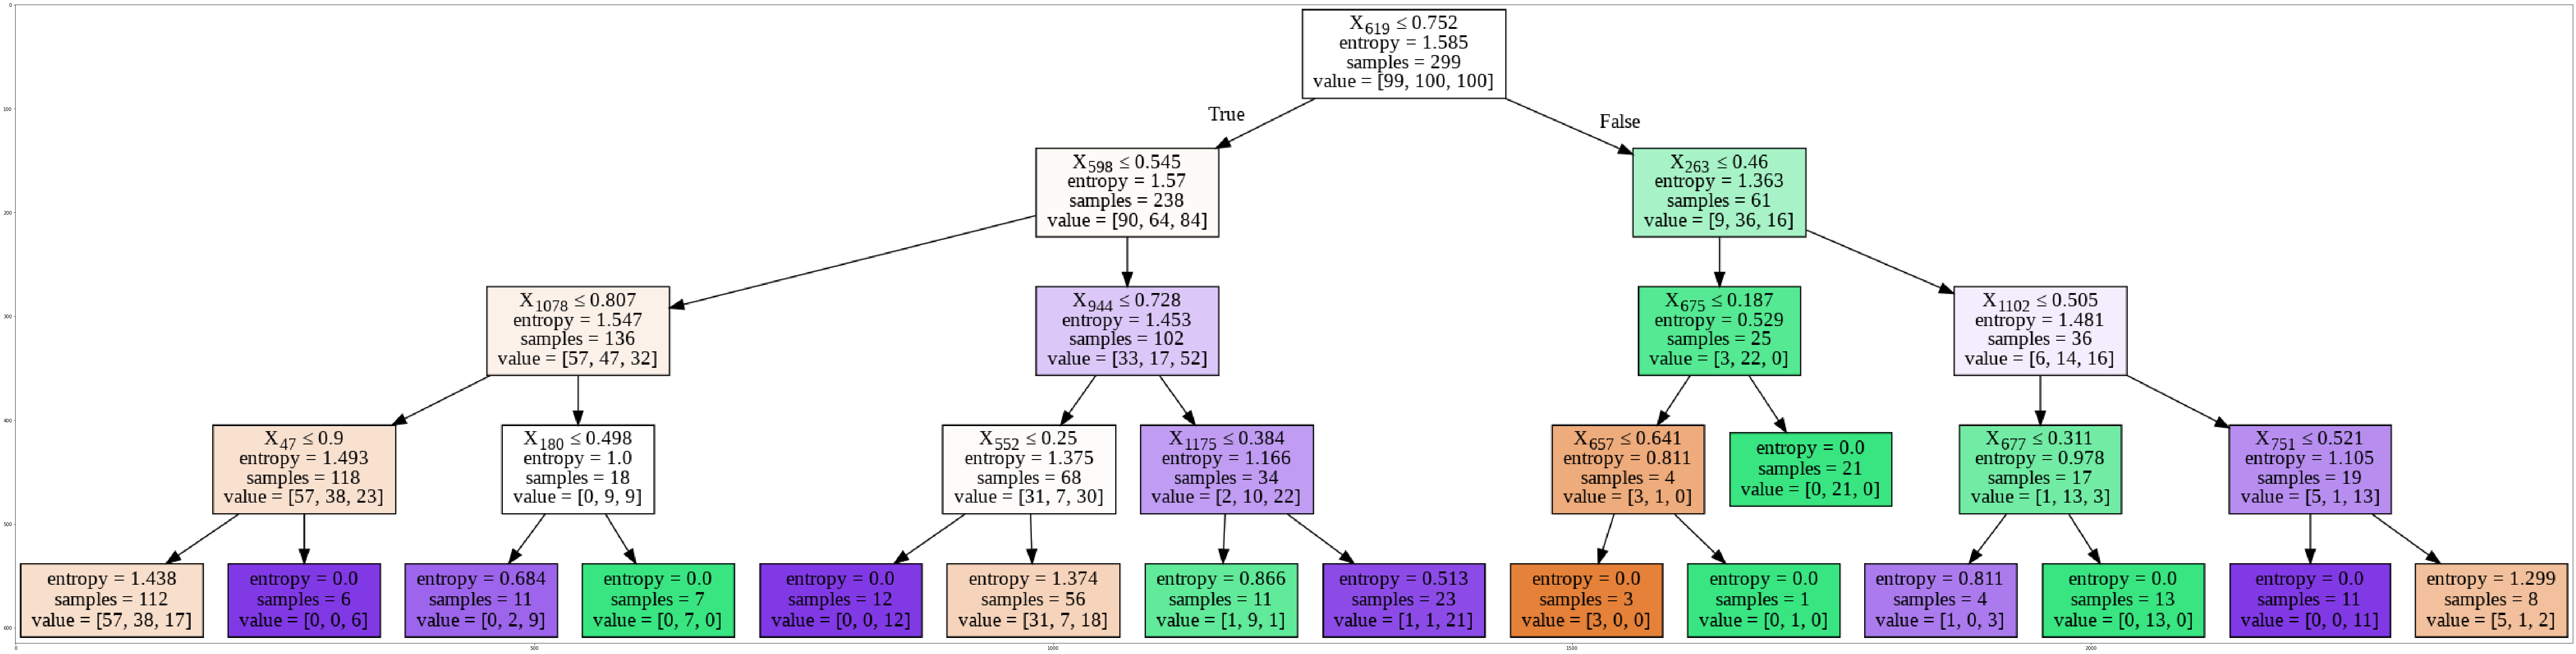

In [74]:
dot_data = StringIO()
filename = "drugtree.png"
#featureNames = my_data.columns[0:5]
out=tree.export_graphviz(drugTree,feature_names=None, out_file=dot_data, filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

## **Using K-Nearest Neighbors**

In [59]:
from sklearn.neighbors import KNeighborsClassifier
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

**predicting**

In [60]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([1., 1., 2., 3., 1.])

**Accuracy evaluation**

In [61]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.5986622073578596
Test set Accuracy:  0.45819397993311034


In [62]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.43478261, 0.17391304, 0.14381271, 0.45819398, 0.24080268,
       0.2173913 , 0.35117057, 0.33779264, 0.37123746])

**Plot model accuracy for Different number of Neighbors**

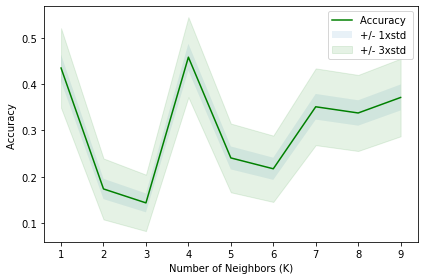

In [65]:
import matplotlib.pyplot as plt
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [66]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.45819397993311034 with k= 4


Here I have worked with two algorithoms 
1. Decision tree
2. K-Nearest Neighbors
The accuract of two models were:
1. Decision tree: 0.3712374581939799
2. K-Nearest Neighbors: 0.45819397993311034 with k= 4
That means K-Nearest Neighbors is giving better accuracy in this case.

K in KNN, is the number of nearest neighbors to examine. It is supposed to be specified by the User. So, how can we choose right value for K? The general solution is to reserve a part of our data for testing the accuracy of the model. Then we chose k =1, used the training part for modeling, and calculate the accuracy of prediction using all samples in our test set. I repeated this process, increasing the k, and see which k is the best for our model.

**We can calculate the accuracy of KNN for different Ks. That is why KNN worked better for time series data so far in my knowledge.**